In [ ]:
from torch import nn
import torch.nn.functional as F
import numpy as np
import torchvision
import torchvision.models as models
from torchvision import datasets
import torchvision.transforms as transforms
from torchvision.transforms.functional import crop
import cv2
import matplotlib.pyplot as plt
import time
import torch
from torch.nn import *

In [ ]:
weights = models.ViT_B_16_Weights
model = models.vit_b_16(weights=weights)
model

/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ViT_B_16_Weights.IMAGENET1K_V1`. You can also use `weights=ViT_B_16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vit_b_16-c867db91.pth" to /root/.cache/torch/hub/checkpoints/vit_b_16-c867db91.pth


  0%|          | 0.00/330M [00:00<?, ?B/s]

VisionTransformer(
  (conv_proj): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
  (encoder): Encoder(
    (dropout): Dropout(p=0.0, inplace=False)
    (layers): Sequential(
      (encoder_layer_0): EncoderBlock(
        (ln_1): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
        (self_attention): MultiheadAttention(
          (out_proj): NonDynamicallyQuantizableLinear(in_features=768, out_features=768, bias=True)
        )
        (dropout): Dropout(p=0.0, inplace=False)
        (ln_2): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
        (mlp): MLPBlock(
          (0): Linear(in_features=768, out_features=3072, bias=True)
          (1): GELU(approximate='none')
          (2): Dropout(p=0.0, inplace=False)
          (3): Linear(in_features=3072, out_features=768, bias=True)
          (4): Dropout(p=0.0, inplace=False)
        )
      )
      (encoder_layer_1): EncoderBlock(
        (ln_1): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
        (self_a

In [ ]:
def crop_r(image):
    return crop(image, 4, 124, 124, 124)
    
def crop_l(image):
    return crop(image, 4, 4, 124, 124)  
    
transform_right = transforms.Compose(
    [
        transforms.Resize((256,256)),
        #transforms.RandomRotation(10),
        transforms.Lambda(crop_r),
        transforms.ToTensor(),
        transforms.Normalize((0.36, 0.36, 0.36), (0.28, 0.28, 0.28))
    ])
transform_left = transforms.Compose(
    [
        transforms.Resize((256,256)),
        #transforms.RandomRotation(10),
        transforms.Lambda(crop_l),
        transforms.ToTensor(),
        transforms.Normalize((0.36, 0.36, 0.36), (0.28, 0.28, 0.28))
    ])

In [ ]:
train_path = '/content/drive/MyDrive/Datasets/TUM'
batch_size = 1

train_r = datasets.ImageFolder(train_path, transform_right)
train_l = datasets.ImageFolder(train_path, transform_left)

train_loader_r = torch.utils.data.DataLoader(train_r, batch_size)
train_loader_l = torch.utils.data.DataLoader(train_l, batch_size)


In [ ]:
weights = models.VGG16_Weights
model = models.vgg16(weights=weights)
model

/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth


  0%|          | 0.00/528M [00:00<?, ?B/s]

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [ ]:
def rightpt(train_loader_r, min_, max_, aux_):
  for i, data in enumerate(train_loader_r):
      if i > min_:
        inputs, labels = data
        output1 = torch.flatten(model.avgpool(model.features(inputs)),1)
        outputs = model.classifier[4](model.classifier[3](model.classifier[2](model.classifier[1](model.classifier[0](output1)))))
        output_.append(outputs)
        if i > max_:
          return output_

In [ ]:
def leftpt(train_loader_l, min_, max_, aux_,output_):
  for i,data in enumerate(train_loader_l):
    if i > min_:
      inputs, labels = data
      output1 = torch.flatten(model.avgpool(model.features(inputs)),1)
      outputs = model.classifier[4](model.classifier[3](model.classifier[2](model.classifier[1](model.classifier[0](output1)))))
      output_[i-aux_] = torch.cat((output_[i-aux_], outputs), 1)
      if i > max_:
          return output_
           

In [ ]:
for n_it in range(1,86):
  output_ = []
  output_new = []
  try:
    if n_it == 1:
      min_ = 0
    else:
      min_ = (n_it-1)*100
    max_ = n_it*100
    aux_ = min_ +1
    output_ = rightpt(train_loader_r, min_, max_, aux_)
    output_new = leftpt(train_loader_l, min_, max_, aux_, output_)
    out_path = '/content/drive/MyDrive/Datasets/tensors_tum_vgg16_original/tensors'+str(n_it)+'.pt'
    torch.save(output_new,out_path)
  except:
    print('error')


error


In [ ]:
def match(cam_img, db_img, dist_limit):
    distance = torch.cdist(cam_img, db_img, p=2)
    max_dist = torch.max(distance)
    min_dist = dist_limit*4/5
    if max_dist > min_dist and max_dist <= dist_limit:
        return True
    return 

In [ ]:
def belief_generation(db, descriptor):
    belief = []
    lp = 0
    for d in db:
        bg = match(descriptor, d, 95)
        if bg:
            belief.append(1)
        else:
            belief = []

        if len(belief) >= 30:
            print('loop')
            print(d)
            lp += 1
    return lp

In [ ]:
database = [database1,database2,database3,database4,database5,database6,database7,database8,database9,database10,
            database11,database12,database13,database14,database15,database16,database17,database18,database19,database20,
            database21,database22,database23,database24,database25,database26,database27,database28,database29,database30,
            database31,database32,database33,database34,database35,database36,database37,database38,database39,database40,
            database41,database42,database43,database44,database45,database46,database47,database48,database49,database50,
            database51,database52,database53,database54,database55,database56,database57,database58,database59,database60,
            database61,database62,database63,database64,database65,database66,database67,database68,database69,database70,
            database71,database72,database73,database74,database75,database76,database77,database78,database79,database80,
            database81,database82,database83]
        
d = []

In [ ]:
co = 0
for bg in database:
  for i,data in enumerate(bg):
    if i < 3 and bg == 1:
      d.append(data)
    else:
      loop_ = belief_generation(d, data)
      if loop_ > 0:
        with open('/content/drive/MyDrive/Datasets/TUM_/loop_tum_vgg16_original_v2.txt', 'a') as txt_file:
          txt_file.write('\n Found loop')
          image_number = (co*100)+i
          txt_file.write('\n image: '+str(image_number))
      else:
        d.append(data)
  co += 1
  


A saída de streaming foi truncada nas últimas 5000 linhas.
tensor([[0.0000, 0.0000, 0.5174,  ..., 0.0000, 0.0000, 0.0000]],
       requires_grad=True)
loop
tensor([[0.0000, 0.0000, 0.3812,  ..., 0.0000, 0.0000, 0.0000]],
       requires_grad=True)
loop
tensor([[0.0000, 0.0000, 0.3264,  ..., 0.0000, 0.0000, 0.0000]],
       requires_grad=True)
loop
tensor([[0.0000, 0.0000, 1.4800,  ..., 0.0000, 0.0000, 0.0000]],
       requires_grad=True)
loop
tensor([[0.0000, 0.1004, 0.0883,  ..., 0.0000, 0.0000, 0.0000]],
       requires_grad=True)
loop
tensor([[0.0000, 0.0000, 1.8494,  ..., 0.0000, 0.0000, 0.0000]],
       requires_grad=True)
loop
tensor([[0.0000, 0.0000, 1.4405,  ..., 0.0000, 0.0000, 0.0000]],
       requires_grad=True)
loop
tensor([[0.0000, 0.0000, 2.5059,  ..., 0.0000, 0.0000, 0.0000]],
       requires_grad=True)
loop
tensor([[0.0000, 0.0000, 1.3595,  ..., 0.0000, 0.0000, 0.0000]],
       requires_grad=True)
loop
tensor([[0.0000, 0.0188, 1.4314,  ..., 0.0000, 0.0000, 0.0000]],
   

In [ ]:
c = 0
for d in database24:
    distance = torch.cdist(d, database25[40], p=2)
    max_dist = torch.max(distance)
    print('image: {}, distance: {}'.format(c, max_dist))
    c += 1

image: 0, distance: 55.56839370727539
image: 1, distance: 55.607967376708984
image: 2, distance: 58.42464065551758
image: 3, distance: 56.972042083740234
image: 4, distance: 60.588722229003906
image: 5, distance: 56.81769561767578
image: 6, distance: 51.685909271240234
image: 7, distance: 57.09001922607422
image: 8, distance: 59.68220901489258
image: 9, distance: 57.67790222167969
image: 10, distance: 58.778465270996094
image: 11, distance: 58.623756408691406
image: 12, distance: 57.073394775390625
image: 13, distance: 56.766666412353516
image: 14, distance: 55.85405349731445
image: 15, distance: 56.2322883605957
image: 16, distance: 55.45021438598633
image: 17, distance: 55.36821365356445
image: 18, distance: 58.01154327392578
image: 19, distance: 50.69841766357422
image: 20, distance: 56.498538970947266
image: 21, distance: 61.776329040527344
image: 22, distance: 63.579341888427734
image: 23, distance: 58.32197570800781
image: 24, distance: 60.062076568603516
image: 25, distance: 56.

In [ ]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/Datasets/metricas/tum_vgg16.csv')


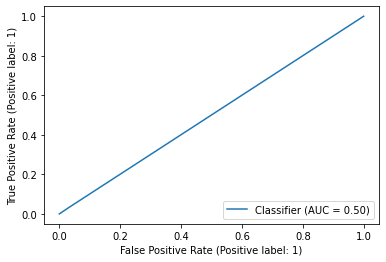

In [ ]:
from sklearn.metrics import RocCurveDisplay
import matplotlib.pyplot as plt


RocCurveDisplay.from_predictions(df['actual'], df['pred'])
plt.show()

In [ ]:
from sklearn.metrics import roc_auc_score, accuracy_score, f1_score


print('AUC: ',roc_auc_score(df['actual'], df['pred']))
print('Accuracy: ',accuracy_score(df['actual'], df['pred']))
print('f1: ',f1_score(df['actual'], df['pred']))


AUC:  0.5004804684233151
Accuracy:  0.8865060240963856
f1:  0.048484848484848485


In [ ]:
from sklearn.metrics import confusion_matrix

confusion_matrix(df['actual'], df['pred'])

array([[7394,  185],
       [ 697,   24]])